In [1]:
from experiments.experiment import Experiment
from experiments.parser import get_parser
import torch
import numpy as np
from rvae.utils.save_utils import load_model
from rvae.vizualization.visualization import (
    
    plot_geodesics,
    plot_latent_space,
    plot_brownian_motion,
    plot_variance,
)
from rvae.misc import connecting_geodesic

In [2]:
parser = get_parser()
args = parser.parse_args(
    args=[
        "--model",
        "RVAE",
        "--dataset",
        "fmnist",
        "--enc_layers",
        "300",
        "300",
        "--dec_layers",
        "300",
        "300",
        "--latent_dim",
        "2",
        "--num_centers",
        "350",
        "--num_components",
        "1",
        "--device",
        "cpu",
        "--ckpt_path",
        # "/home/prz/PROJECTS/rvae_reproduction/saved_models/RVAE/fmnist_warmup",
        "/home/prz/PROJECTS/rvae_reproduction/saved_models/RVAE/fmnist_epoch100ckpt",
    ]
)
exp = Experiment(args)
exp.fixed_load_just_model(pretrained_path=r"C:\Users\Karol\Desktop\ML\rvae\rvae_reproduction\saved_models\RVAE\fmnist_epoch100ckpt.zip")


In [3]:
## get samples once
samples = []
labels = []
for _, data in enumerate(exp.train_loader):
    x, y = data
    z, _, _ = exp.model.encode(x.view(-1, 784))  # , 1)
    samples.append(z)
    labels.append(y)

samples = torch.stack(samples, dim=0).view(-1, 2)
labels = torch.stack(labels).view(-1)
exp.model.p_sigma._modules["0"].beta = 0.07


model = exp.model
# idcs = np.random.choice(samples.shape[0], 2)
# sample1 = samples[idcs[0]].unsqueeze(0)
# sample2 = samples[idcs[1]].unsqueeze(0)

sample1 = samples[10].unsqueeze(0)
sample2 = samples[3000].unsqueeze(0)


In [4]:
curve_cubic, energy_cubic = connecting_geodesic(model, sample1,sample2, n_nodes=32, eval_grid = 64, max_iter = 500, l_rate=1e-3, if_cubic=True)
curve_linear, energy_linear = connecting_geodesic(model, sample1,sample2, n_nodes=32, eval_grid = 64, max_iter = 500, l_rate=1e-3, if_cubic=False)


In [5]:
print(curve_cubic(torch.arange(start=0, end=1, step=0.05)))
print(curve_linear(torch.arange(start=0, end=1, step=0.05)))

tensor([[-9.8482, -7.8381],
        [-9.4545, -7.4305],
        [-9.0607, -7.0230],
        [-8.6670, -6.6154],
        [-8.2733, -6.2079],
        [-7.8796, -5.8003],
        [-7.4858, -5.3928],
        [-7.0921, -4.9852],
        [-6.6984, -4.5777],
        [-6.3047, -4.1702],
        [-5.9109, -3.7626],
        [-5.5172, -3.3551],
        [-5.1235, -2.9475],
        [-4.7298, -2.5400],
        [-4.3361, -2.1324],
        [-3.9423, -1.7249],
        [-3.5486, -1.3173],
        [-3.1549, -0.9098],
        [-2.7612, -0.5022],
        [-2.3674, -0.0947]], grad_fn=<SqueezeBackward4>)
tensor([[-9.8482, -7.8381],
        [-9.4545, -7.4305],
        [-9.0607, -7.0230],
        [-8.6670, -6.6154],
        [-8.2733, -6.2079],
        [-7.8796, -5.8003],
        [-7.4858, -5.3928],
        [-7.0921, -4.9852],
        [-6.6984, -4.5777],
        [-6.3047, -4.1702],
        [-5.9109, -3.7626],
        [-5.5172, -3.3551],
        [-5.1235, -2.9475],
        [-4.7298, -2.5400],
        [-4.3361, -

---
---
---

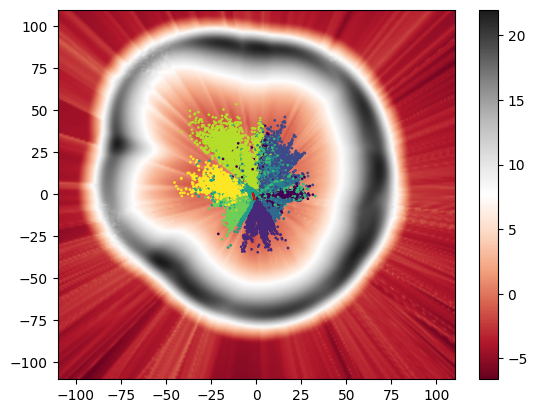

(array([[-1.7028797 ,  0.4275347 ],
        [-1.6665932 ,  0.25863305],
        [-1.6303067 ,  0.08973137],
        [-1.5940204 , -0.07917026],
        [-1.5577338 , -0.24807194],
        [-1.5214473 , -0.41697356],
        [-1.4851608 , -0.5858753 ],
        [-1.4488744 , -0.7547769 ],
        [-1.412588  , -0.9236785 ],
        [-1.3763014 , -1.0925803 ],
        [-1.340015  , -1.2614818 ],
        [-1.3037286 , -1.4303836 ],
        [-1.267442  , -1.5992852 ],
        [-1.2311556 , -1.7681868 ],
        [-1.1948692 , -1.9370885 ],
        [-1.1585827 , -2.10599   ],
        [-1.1222962 , -2.2748919 ],
        [-1.0860097 , -2.4437933 ],
        [-1.0497233 , -2.612695  ],
        [-1.0134369 , -2.7815967 ]], dtype=float32),
 tensor([[-1.7029,  0.4275],
         [-1.6684,  0.2671],
         [-1.6339,  0.1066],
         [-1.5995, -0.0538],
         [-1.5650, -0.2143],
         [-1.5305, -0.3747],
         [-1.4960, -0.5352],
         [-1.4616, -0.6957],
         [-1.4271, -0.8561],
  

In [6]:

plot_geodesics(
    model=exp.model,
    data_loader=exp.train_loader,
    save_dir="/home/prz/PROJECTS/rvae_reproduction/notebooks",
    device=torch.device("cpu"),
    if_cubic=True,
    random_seed=42,
)

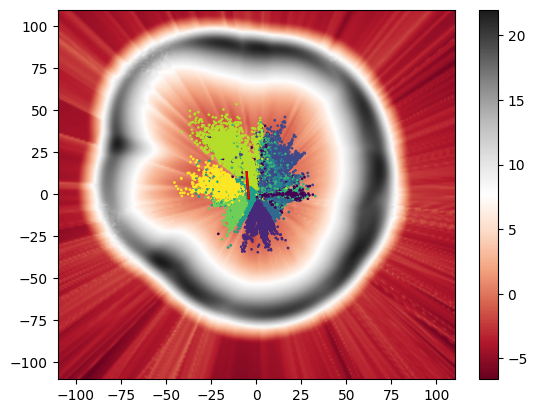

(array([[-5.2508492 , 13.277908  ],
        [-5.1918073 , 12.459506  ],
        [-5.1327653 , 11.641104  ],
        [-5.073723  , 10.822702  ],
        [-5.014681  , 10.004299  ],
        [-4.9556394 ,  9.185898  ],
        [-4.896597  ,  8.367495  ],
        [-4.8375554 ,  7.5490937 ],
        [-4.778513  ,  6.730691  ],
        [-4.719471  ,  5.912289  ],
        [-4.660429  ,  5.0938873 ],
        [-4.601387  ,  4.275485  ],
        [-4.542345  ,  3.4570827 ],
        [-4.4833026 ,  2.638681  ],
        [-4.4242606 ,  1.8202795 ],
        [-4.3652186 ,  1.0018766 ],
        [-4.306177  ,  0.18347435],
        [-4.247135  , -0.6349273 ],
        [-4.188093  , -1.4533292 ],
        [-4.1290507 , -2.271731  ]], dtype=float32),
 tensor([[-5.2508, 13.2779],
         [-5.1948, 12.5004],
         [-5.1387, 11.7229],
         [-5.0826, 10.9455],
         [-5.0265, 10.1680],
         [-4.9704,  9.3905],
         [-4.9143,  8.6130],
         [-4.8582,  7.8355],
         [-4.8021,  7.0581],
  

In [7]:
plot_geodesics(
    model=exp.model,
    data_loader=exp.train_loader,
    save_dir="/home/prz/PROJECTS/rvae_reproduction/notebooks",
    device=torch.device("cpu"),
    if_cubic=False,
    random_seed=42,
)